<a href="https://colab.research.google.com/github/writezubair-cpu/ZAK-TEST_AI_Training/blob/main/Copy_of_hydraulic_predictive_maintanence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Brief: Condition Monitoring of a Hydraulic System
1. Overview
You will work with a real industrial hydraulic test rig dataset from the UCI Machine
Learning Repository. The system repeats 60-second load cycles and records multi-sensor
time series (pressures, flows, temperatures, motor power, vibration, and efficiency
metrics) while four key components degrade: cooler, valve, pump, and accumulator.

##Goal: Detect and classify component degradation using sensor data (predictive
maintenance).

# 2. Dataset
• 2205 cycles (rows); each row = 1 load cycle (~60 seconds)
• 43680 attributes (columns) – unfolded multi-rate time series per cycle
• Sensors: PS1–PS6 (pressure), EPS1 (motor power), FS1–FS2 (flows), TS1–TS4
(temperatures), VS1 (vibration), CE/CP/SE (performance indices)
• Targets (from profile.txt):
- Cooler condition (%): {3, 20, 100}
- Valve condition (%): {100, 90, 80, 73}
- Pump leakage: {0, 1, 2}
- Accumulator pressure (bar): {130, 115, 100, 90}
- Stable flag: {0, 1}

#3. Core Tasks
A. EDA
• Load data; inspect shapes and target distributions.
• Plot sample cycles for key sensors (e.g., PS1, TS1, VS1).
• Compare healthy vs faulty states for one target (e.g., pump leakage).

B. Feature Engineering (cycle-level)
For a subset of sensors (e.g., 2 pressures, 1 flow, 1 temperature, vibration):
• Compute mean, std, min, max, percentiles, and simple trend features per cycle.
• Optionally add domain features (pressure range, temperature gradient, RMS vibration).

C. Single-Target Classification
Pick one target (recommended: pump leakage or cooler condition).
• Train at least 2 models (e.g., Logistic Regression / Decision Tree vs Random
Forest/XGBoost).
• Evaluate with accuracy, macro F1, and a confusion matrix.


D. Interpretation & Business Insight
• Show feature importance (e.g., Random Forest or permutation importance).
• Explain: Which sensors and patterns indicate degradation? How do vibration/temperature
change as failure worsens?
• Write 1–2 paragraphs in plain language for a maintenance engineer.

#4. Stretch Tasks (Optional)
• Multi-target models (predict multiple component states).
• Anomaly detection / health index using autoencoders or Isolation Forest.
• Simple dashboard (Gradio/Streamlit) to input features and get a risk prediction.
5. Deliverables
• Jupyter/Colab notebook with clear sections (Intro, EDA, Features, Models, Insights).
• Short report or 3–5 slide deck summarizing approach, performance, and recommendations.

In [ ]:
https://archive.ics.uci.edu/dataset/447/condition+monitoring+of+hydraulic+systems



Global CE stats:
  Min:  17.042
  Max:  48.777
  Mean: 31.299
  Std:  11.578


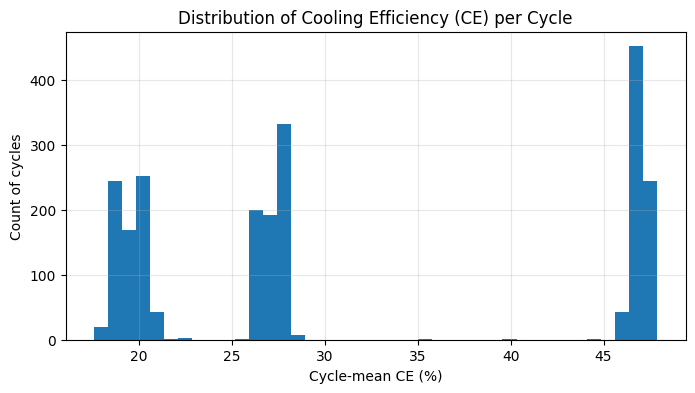

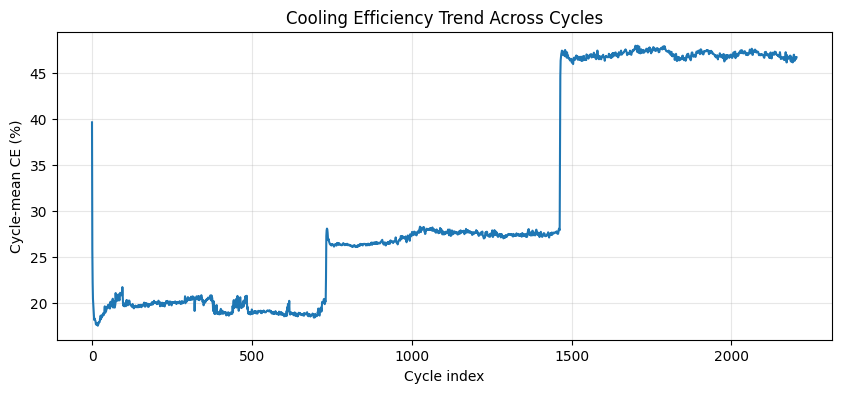

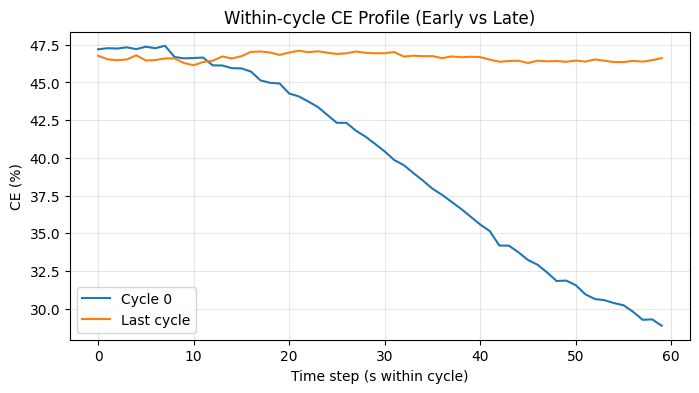

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- 1) Load and reshape CE data ---
ce_raw = np.loadtxt("CE.txt")              # 132,300 values
n_cycles, cycle_len = 2205, 60
ce = ce_raw.reshape(n_cycles, cycle_len)   # (2205, 60)

# Per-cycle stats
cycle_mean = ce.mean(axis=1)
cycle_std = ce.std(axis=1)

print(f"Global CE stats:")
print(f"  Min:  {ce_raw.min():.3f}")
print(f"  Max:  {ce_raw.max():.3f}")
print(f"  Mean: {ce_raw.mean():.3f}")
print(f"  Std:  {ce_raw.std():.3f}")

# --- 2) Histogram of cycle-mean CE (shows 3 regimes) ---
plt.figure(figsize=(8, 4))
plt.hist(cycle_mean, bins=40)
plt.xlabel("Cycle-mean CE (%)")
plt.ylabel("Count of cycles")
plt.title("Distribution of Cooling Efficiency (CE) per Cycle")
plt.grid(alpha=0.3)
plt.show()

# --- 3) CE trend over cycles ---
plt.figure(figsize=(10, 4))
plt.plot(cycle_mean)
plt.xlabel("Cycle index")
plt.ylabel("Cycle-mean CE (%)")
plt.title("Cooling Efficiency Trend Across Cycles")
plt.grid(alpha=0.3)
plt.show()

# --- 4) Example single-cycle profile (early vs late) ---
plt.figure(figsize=(8, 4))
plt.plot(ce[0], label="Cycle 0")
plt.plot(ce[-1], label="Last cycle")
plt.xlabel("Time step (s within cycle)")
plt.ylabel("CE (%)")
plt.title("Within-cycle CE Profile (Early vs Late)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()
